In [2]:
# read sheet2 from oildata_oecd.xlsx
import pandas as pd

df = pd.read_excel('oildata_oecd.xlsx', sheet_name='Sheet2')

# print the first 5 rows
print(df.head())


        Time  Nigeria  Venezuela  UnitedArabEmirates  SaudiArabia  Libya  \
0 1973-01-31    1.936      3.272               1.416        6.876  2.293   
1 1973-02-28    1.944      3.309               1.597        7.194  2.250   
2 1973-03-31    1.933      3.330               1.548        7.481  2.287   
3 1973-04-30    1.963      3.360               1.602        7.359  2.318   
4 1973-05-31    1.957      3.426               1.613        8.316  2.251   

   Kuwait   Iraq  Algeria   Iran  ...  Iran_bench2  Iran_bench3  Iran_bench4  \
0   3.768  1.527    1.142  5.808  ...          NaN          NaN          NaN   
1   3.340  1.687    1.142  5.835  ...          NaN          NaN          NaN   
2   2.753  2.044    1.142  5.832  ...          NaN          NaN          NaN   
3   2.699  2.152    1.142  5.769  ...          NaN          NaN          NaN   
4   2.827  2.117    1.153  5.842  ...          NaN          NaN          NaN   

   Iran_crate  SaudiArab_crate  Iran_count  Iraq_count  Kuwait

In [3]:
print(df.columns)


Index(['Time', 'Nigeria', 'Venezuela', 'UnitedArabEmirates', 'SaudiArabia',
       'Libya', 'Kuwait', 'Iraq', 'Algeria', 'Iran', 'Unnamed: 10', 'OPEC',
       'World', 'Unnamed: 13', 'Iran_bench1', 'Iran_bench2', 'Iran_bench3',
       'Iran_bench4', 'Iran_crate', 'SaudiArab_crate', 'Iran_count',
       'Iraq_count', 'Kuwait_count', 'SaudiArab_count', 'Venezuela_count'],
      dtype='object')


In [4]:
# create new columns for shocks in Iran, Iraq, Kuwait, Saudi Arabia and Venezuela
# which are the differences between production and counterfactual if counterfactual exists
df['Iran_shock'] = df['Iran'] - df['Iran_count']
df['Iraq_shock'] = df['Iraq'] - df['Iraq_count']
df['Kuwait_shock'] = df['Kuwait'] - df['Kuwait_count']
df['SaudiArabia_shock'] = df['SaudiArabia'] - df['SaudiArab_count']  # Fixed column name
df['Venezuela_shock'] = df['Venezuela'] - df['Venezuela_count']
# print all shock columns
print("Iran shock:")
print(df['Iran_shock'])
# print("\nIraq shock:")
# print(df['Iraq_shock'])
# print("\nKuwait shock:")
# print(df['Kuwait_shock'])
# print("\nSaudi Arabia shock:")
# print(df['Sarabia_shock'])
# print("\nVenezuela shock:")
# print(df['Venezuela_shock'])

Iran shock:
0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
         ...   
615   -1.501851
616   -1.552437
617   -1.515061
618   -1.524083
619   -1.544120
Name: Iran_shock, Length: 620, dtype: float64


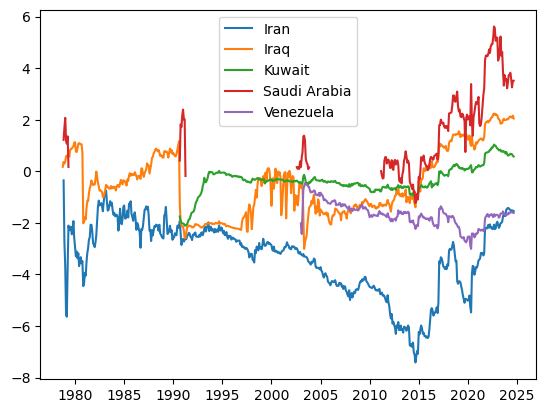

In [5]:
# plot the shocks of different countries in one plot 
import matplotlib.pyplot as plt

plt.plot(df['Time'], df['Iran_shock'], label='Iran')
plt.plot(df['Time'], df['Iraq_shock'], label='Iraq')
plt.plot(df['Time'], df['Kuwait_shock'], label='Kuwait')
plt.plot(df['Time'], df['SaudiArabia_shock'], label='Saudi Arabia')
plt.plot(df['Time'], df['Venezuela_shock'], label='Venezuela')
plt.legend()
plt.show()



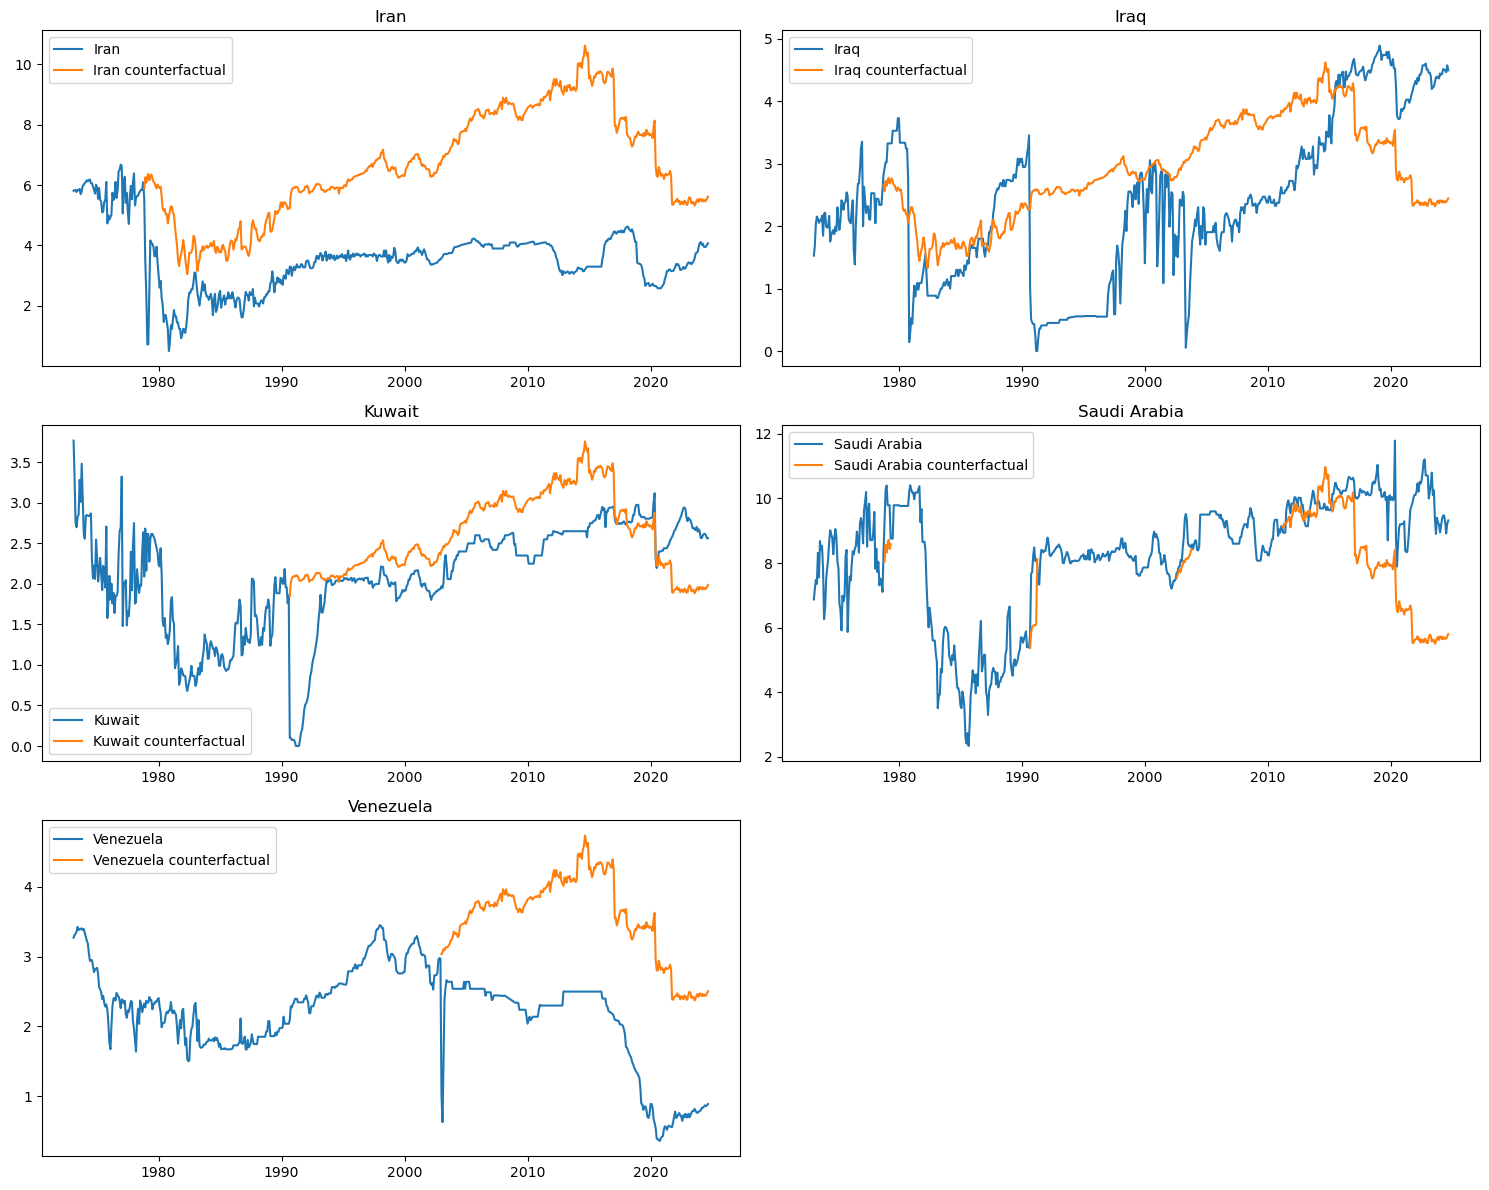

In [6]:
# plot actual vs counterfactual production for each country
plt.figure(figsize=(15, 12))  # Make figure bigger

# Iran
plt.subplot(3, 2, 1)
plt.plot(df['Time'], df['Iran'], label='Iran')
plt.plot(df['Time'], df['Iran_count'], label='Iran counterfactual')
plt.legend()
plt.title('Iran')

# Iraq 
plt.subplot(3, 2, 2)
plt.plot(df['Time'], df['Iraq'], label='Iraq')
plt.plot(df['Time'], df['Iraq_count'], label='Iraq counterfactual')
plt.legend()
plt.title('Iraq')

# Kuwait
plt.subplot(3, 2, 3)
plt.plot(df['Time'], df['Kuwait'], label='Kuwait')
plt.plot(df['Time'], df['Kuwait_count'], label='Kuwait counterfactual')
plt.legend()
plt.title('Kuwait')

# Saudi Arabia
plt.subplot(3, 2, 4)
plt.plot(df['Time'], df['SaudiArabia'], label='Saudi Arabia')
plt.plot(df['Time'], df['SaudiArab_count'], label='Saudi Arabia counterfactual')
plt.legend()
plt.title('Saudi Arabia')

# Venezuela
plt.subplot(3, 2, 5)
plt.plot(df['Time'], df['Venezuela'], label='Venezuela')
plt.plot(df['Time'], df['Venezuela_count'], label='Venezuela counterfactual')
plt.legend()
plt.title('Venezuela')

plt.tight_layout()
plt.show()


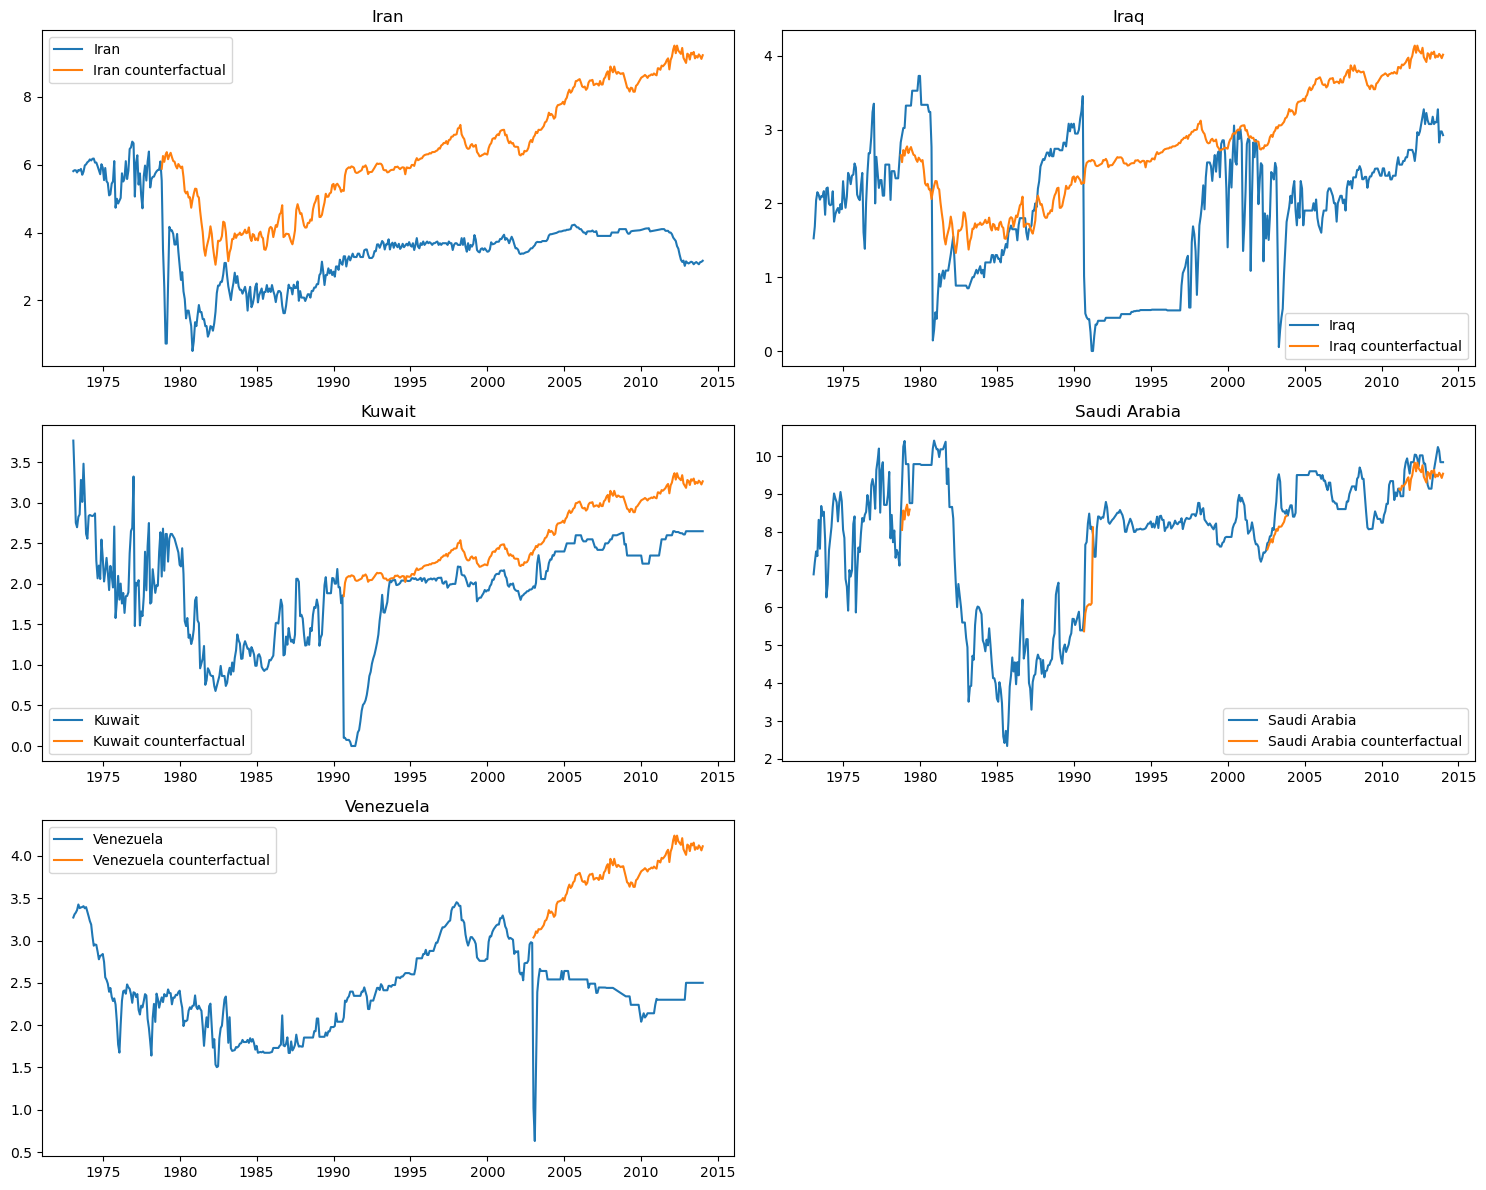

In [12]:
        # plot actual vs counterfactual production for each country
plt.figure(figsize=(15, 12))  # Make figure bigger

# Filter data before 2008
df_filtered = df[df['Time'].dt.year < 2014]

# Iran
plt.subplot(3, 2, 1)
plt.plot(df_filtered['Time'], df_filtered['Iran'], label='Iran')
plt.plot(df_filtered['Time'], df_filtered['Iran_count'], label='Iran counterfactual')
plt.legend()
plt.title('Iran')

# Iraq 
plt.subplot(3, 2, 2)
plt.plot(df_filtered['Time'], df_filtered['Iraq'], label='Iraq')
plt.plot(df_filtered['Time'], df_filtered['Iraq_count'], label='Iraq counterfactual')
plt.legend()
plt.title('Iraq')

# Kuwait
plt.subplot(3, 2, 3)
plt.plot(df_filtered['Time'], df_filtered['Kuwait'], label='Kuwait')
plt.plot(df_filtered['Time'], df_filtered['Kuwait_count'], label='Kuwait counterfactual')
plt.legend()
plt.title('Kuwait')

# Saudi Arabia
plt.subplot(3, 2, 4)
plt.plot(df_filtered['Time'], df_filtered['SaudiArabia'], label='Saudi Arabia')
plt.plot(df_filtered['Time'], df_filtered['SaudiArab_count'], label='Saudi Arabia counterfactual')
plt.legend()
plt.title('Saudi Arabia')

# Venezuela
plt.subplot(3, 2, 5)
plt.plot(df_filtered['Time'], df_filtered['Venezuela'], label='Venezuela')
plt.plot(df_filtered['Time'], df_filtered['Venezuela_count'], label='Venezuela counterfactual')
plt.legend()
plt.title('Venezuela')

plt.tight_layout()
plt.show()


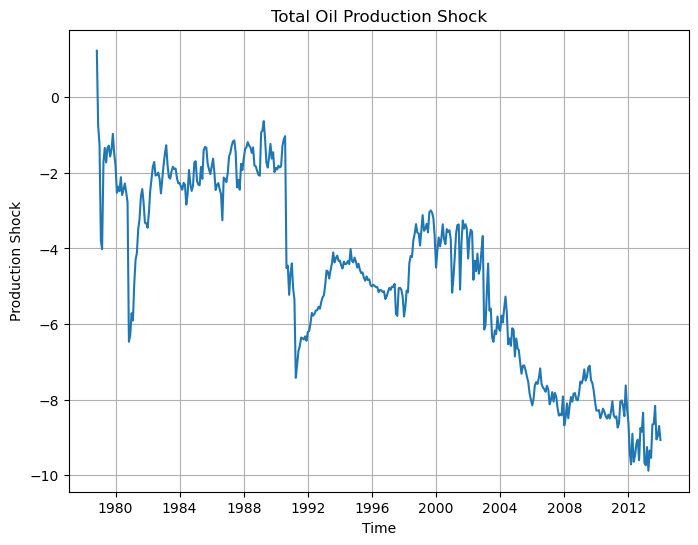

In [13]:
# Calculate shocks for each country (actual - counterfactual)
df['Iran_shock'] = df['Iran'] - df['Iran_count']
df['Iraq_shock'] = df['Iraq'] - df['Iraq_count'] 
df['Kuwait_shock'] = df['Kuwait'] - df['Kuwait_count']
df['SaudiArabia_shock'] = df['SaudiArabia'] - df['SaudiArab_count']
df['Venezuela_shock'] = df['Venezuela'] - df['Venezuela_count']

# Fill missing values with 0
df['Iran_shock'] = df['Iran_shock'].fillna(0)
df['Iraq_shock'] = df['Iraq_shock'].fillna(0)
df['Kuwait_shock'] = df['Kuwait_shock'].fillna(0) 
df['SaudiArabia_shock'] = df['SaudiArabia_shock'].fillna(0)
df['Venezuela_shock'] = df['Venezuela_shock'].fillna(0)

# Sum all shocks
df['total_shock'] = df['Iran_shock'] + df['Iraq_shock'] + df['Kuwait_shock'] + df['SaudiArabia_shock'] + df['Venezuela_shock']

# Filter data between Oct 1978 and Jan 2008
mask = (df['Time'] >= '1978-10-01') & (df['Time'] <= '2014-01-01')
df_filtered = df[mask]

# Plot total shock
plt.figure(figsize=(8, 6))
plt.plot(df_filtered['Time'], df_filtered['total_shock'])
plt.title('Total Oil Production Shock')
plt.xlabel('Time')
plt.ylabel('Production Shock')
plt.grid(True)
plt.show()




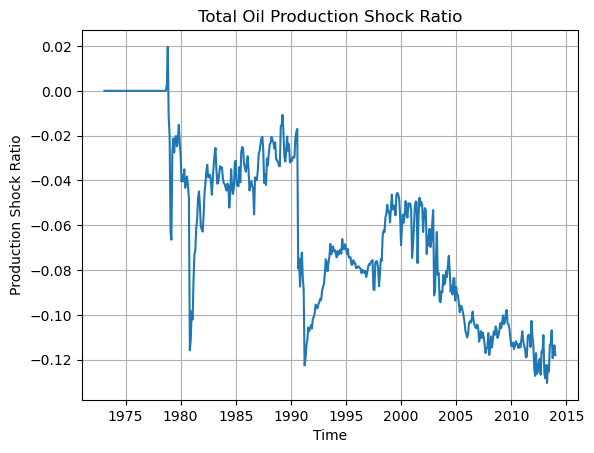

In [14]:
# generate a new column for the total shock divided by the total production(i.e. the column named 'World')
df['total_shock_ratio'] = df['total_shock'] / df['World']

# plot the total shock ratio before 2015.1  
df_filtered = df[df['Time'].dt.year < 2014]
plt.plot(df_filtered['Time'], df_filtered['total_shock_ratio'])
plt.title('Total Oil Production Shock Ratio')
plt.xlabel('Time')
plt.ylabel('Production Shock Ratio')
plt.grid(True)
plt.show()


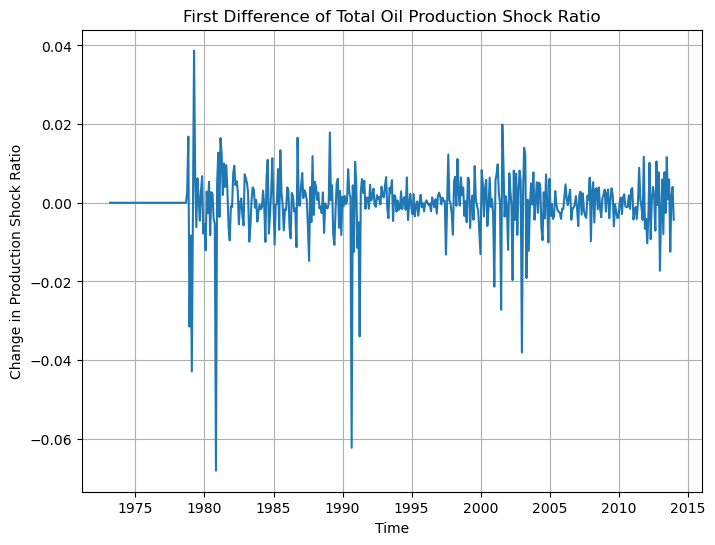

In [15]:
# Calculate first difference of total shock ratio
df['total_shock_ratio_diff'] = df['total_shock_ratio'].diff()

# Plot first difference of total shock ratio before 2014
df_filtered = df[df['Time'].dt.year < 2014]
plt.figure(figsize=(8, 6))
plt.plot(df_filtered['Time'], df_filtered['total_shock_ratio_diff'])
plt.title('First Difference of Total Oil Production Shock Ratio')
plt.xlabel('Time') 
plt.ylabel('Change in Production Shock Ratio')
plt.grid(True)
plt.show()


In [16]:
# Create a DataFrame with Time and total_shock_ratio_diff columns
df_shock_diff = pd.DataFrame({
    'Time': df['Time'].dt.strftime('%Y-%m-%d'),
    'total_shock_ratio_diff': df['total_shock_ratio_diff']
})

# Save to Excel file
df_shock_diff.to_excel('shock_ratio_diff_daily.xlsx', index=False)



In [17]:
# save the df to a new excel file, note the time should be in the date format 
df['Time'] = df['Time'].dt.strftime('%Y-%m-%d')
df.to_excel('oil_data_with_shocks.xlsx', index=False)


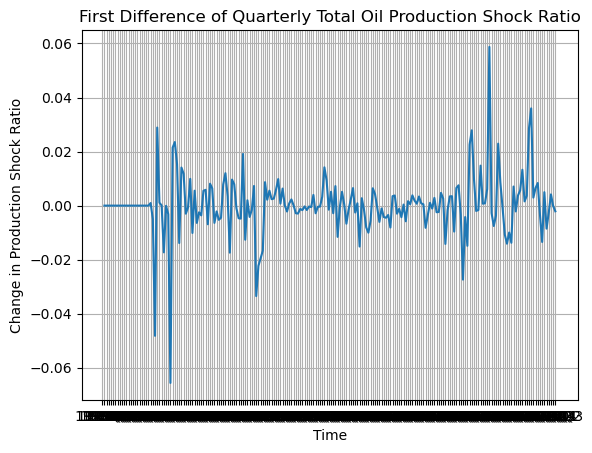

In [18]:
# Convert Time back to datetime format since we converted it to string in previous cell
df['Time'] = pd.to_datetime(df['Time'])

# Group by quarter and sum the total shock
quarterly_shock = df.groupby(pd.PeriodIndex(df['Time'], freq='Q'))['total_shock'].sum()
quarterly_world = df.groupby(pd.PeriodIndex(df['Time'], freq='Q'))['World'].sum()
quarterly_shock_ratio = quarterly_shock / quarterly_world
# first difference of quarterly_shock_ratio
quarterly_shock_ratio_diff = quarterly_shock_ratio.diff()
# show the quarterly_shock_ratio_diff with time
plt.plot(quarterly_shock_ratio_diff.index.astype(str), quarterly_shock_ratio_diff.values)
plt.title('First Difference of Quarterly Total Oil Production Shock Ratio')
plt.xlabel('Time') 
plt.ylabel('Change in Production Shock Ratio')
plt.grid(True)
plt.show()


In [19]:
# save the quarterly_shock_ratio_diff and the corresponding time to a new excel file
df_quarterly_shock_ratio_diff = pd.DataFrame({'Time': quarterly_shock_ratio_diff.index.astype(str), 'total_shock_ratio_diff': quarterly_shock_ratio_diff.values})
df_quarterly_shock_ratio_diff.to_excel('shock_ratio_diff_quarterly.xlsx', index=False)



Shape of df_quarter after reading: (135, 2)

First few rows of df_quarter:
        time  shock
0 1971-01-01    0.0
1 1971-04-01    0.0
2 1971-07-01    0.0
3 1971-10-01    0.0
4 1972-01-01    0.0

Range of shock values after conversion: Min: -0.066, Max: 0.029

Unique values in time column before conversion:
<DatetimeArray>
['1971-01-01 00:00:00', '1971-04-01 00:00:00', '1971-07-01 00:00:00',
 '1971-10-01 00:00:00', '1972-01-01 00:00:00', '1972-04-01 00:00:00',
 '1972-07-01 00:00:00', '1972-10-01 00:00:00', '1973-01-01 00:00:00',
 '1973-04-01 00:00:00',
 ...
 '2002-04-01 00:00:00', '2002-07-01 00:00:00', '2002-10-01 00:00:00',
 '2003-01-01 00:00:00', '2003-04-01 00:00:00', '2003-07-01 00:00:00',
 '2003-10-01 00:00:00', '2004-01-01 00:00:00', '2004-04-01 00:00:00',
 '2004-07-01 00:00:00']
Length: 135, dtype: datetime64[ns]

Time range in df_quarter: From 1971-01-01 00:00:00 to 2004-07-01 00:00:00
Time range in df_quarterly_shock_ratio_diff: From 1973-01-01 00:00:00 to 2024-07-01 00:00:00

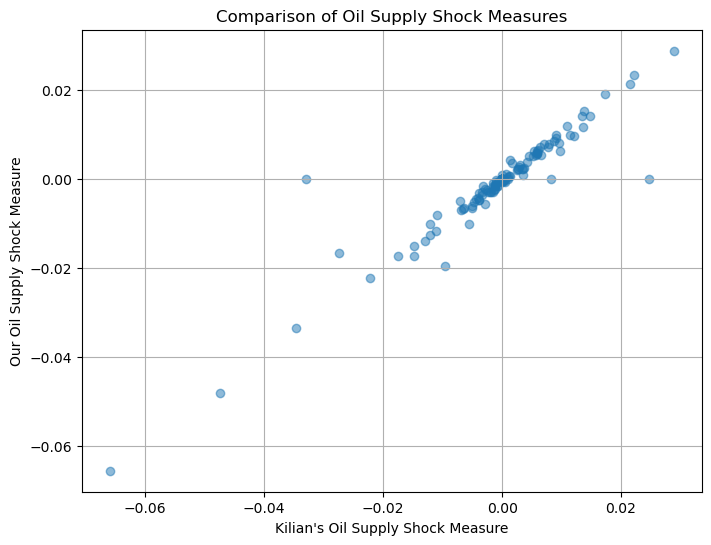


First few rows of merged data:
        time     shock  total_shock_ratio_diff
0 1973-01-01  0.000000                     NaN
1 1973-04-01  0.000000                     0.0
2 1973-07-01  0.000000                     0.0
3 1973-10-01 -0.032902                     0.0
4 1974-01-01  0.024715                     0.0


In [118]:
# Read the 'quarter' sheet from the Excel file
df_quarter = pd.read_excel('oilshock_kilian_quarter.xlsx', sheet_name='quarter')
print("Shape of df_quarter after reading:", df_quarter.shape)
print("\nFirst few rows of df_quarter:")
print(df_quarter.head())

# Convert shock values from percentage to decimal
df_quarter['shock'] = df_quarter['shock'] / 100
print("\nRange of shock values after conversion:", 
      f"Min: {df_quarter['shock'].min():.3f}, Max: {df_quarter['shock'].max():.3f}")

# Convert 'time' column to datetime format
print("\nUnique values in time column before conversion:")
print(df_quarter['time'].unique())
df_quarter['time'] = pd.to_datetime(df_quarter['time'], errors='coerce')

# Warn if there are NaT values in 'time' column
nat_values = df_quarter['time'].isnull().sum()
if nat_values > 0:
    print(f"\nWarning: {nat_values} NaT values found in 'time' column after conversion.")
    print("Rows with NaT values:")
    print(df_quarter[df_quarter['time'].isnull()])

df_quarterly_shock_ratio_diff['time'] = pd.to_datetime(df_quarterly_shock_ratio_diff['time'])


# Print time ranges before merge
print("\nTime range in df_quarter:", 
      f"From {df_quarter['time'].min()} to {df_quarter['time'].max()}")
print("Time range in df_quarterly_shock_ratio_diff:", 
      f"From {df_quarterly_shock_ratio_diff['time'].min()} to {df_quarterly_shock_ratio_diff['time'].max()}")

# Merge dataframes on 'time' and 'Time' columns
merged_df = pd.merge(df_quarter, df_quarterly_shock_ratio_diff, on='time', how='inner')
print("\nShape of merged_df:", merged_df.shape)


# Create scatter plot if merged_df is not empty
if not merged_df.empty:
    plt.figure(figsize=(8, 6))
    plt.scatter(merged_df['shock'], merged_df['total_shock_ratio_diff'], alpha=0.5)
    plt.xlabel("Kilian's Oil Supply Shock Measure")
    plt.ylabel('Our Oil Supply Shock Measure')
    plt.title('Comparison of Oil Supply Shock Measures')
    plt.grid(True)
    plt.show()
else:
    print("Scatter plot cannot be created due to empty merged dataframe.")

# Display first few rows of merged data if not empty
if not merged_df.empty:
    print("\nFirst few rows of merged data:")
    print(merged_df[['time', 'shock', 'total_shock_ratio_diff']].head())
else:
    print("No data to display due to empty merged dataframe.")


In [120]:
# Filter data for the specified time period
filtered_df = merged_df[(merged_df['time'] >= '1978-10-01') & (merged_df['time'] <= '2004-07-31')]
# Calculate correlation
correlation = filtered_df['shock'].corr(filtered_df['total_shock_ratio_diff'])

print(f"\nCorrelation between Kilian's and our oil supply shock measures")
print(f"Correlation coefficient: {correlation:.3f}")



Correlation between Kilian's and our oil supply shock measures
Correlation coefficient: 0.989
